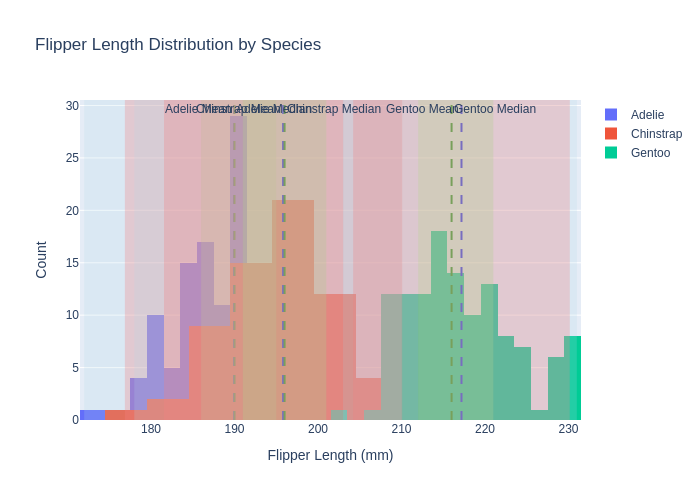

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# List of penguin species
species_list = penguins['species'].unique()

# Create an empty figure
fig = go.Figure()

# Function to add statistical markers (mean, median, range, IQR, 2*std)
def add_statistical_markers(df, species_name):
    flipper_lengths = df['flipper_length_mm'].dropna()

    # Calculate statistics
    mean_val = flipper_lengths.mean()
    median_val = flipper_lengths.median()
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()
    std_val = flipper_lengths.std()
    q1_val = flipper_lengths.quantile(0.25)
    q3_val = flipper_lengths.quantile(0.75)

    # Add histogram
    fig.add_trace(go.Histogram(x=flipper_lengths, name=f'{species_name}'))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line=dict(color='blue', dash='dash'), annotation_text=f'{species_name} Mean', annotation_position='top left')
    fig.add_vline(x=median_val, line=dict(color='green', dash='dash'), annotation_text=f'{species_name} Median', annotation_position='top right')

    # Add vertical rectangle for range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightblue", opacity=0.2, line_width=0)

    # Add vertical rectangle for IQR
    fig.add_vrect(x0=q1_val, x1=q3_val, fillcolor="lightgreen", opacity=0.3, line_width=0)

    # Add vertical rectangle for 2 * std range
    fig.add_vrect(x0=mean_val - 2 * std_val, x1=mean_val + 2 * std_val, fillcolor="lightcoral", opacity=0.3, line_width=0)

# Loop through each species and create histograms with markers
for species in species_list:
    species_df = penguins[penguins['species'] == species]
    add_statistical_markers(species_df, species)

# Update layout
fig.update_layout(title='Flipper Length Distribution by Species',
                  xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  barmode='overlay')

# Show the plot
fig.show(renderer="png")



# Q2

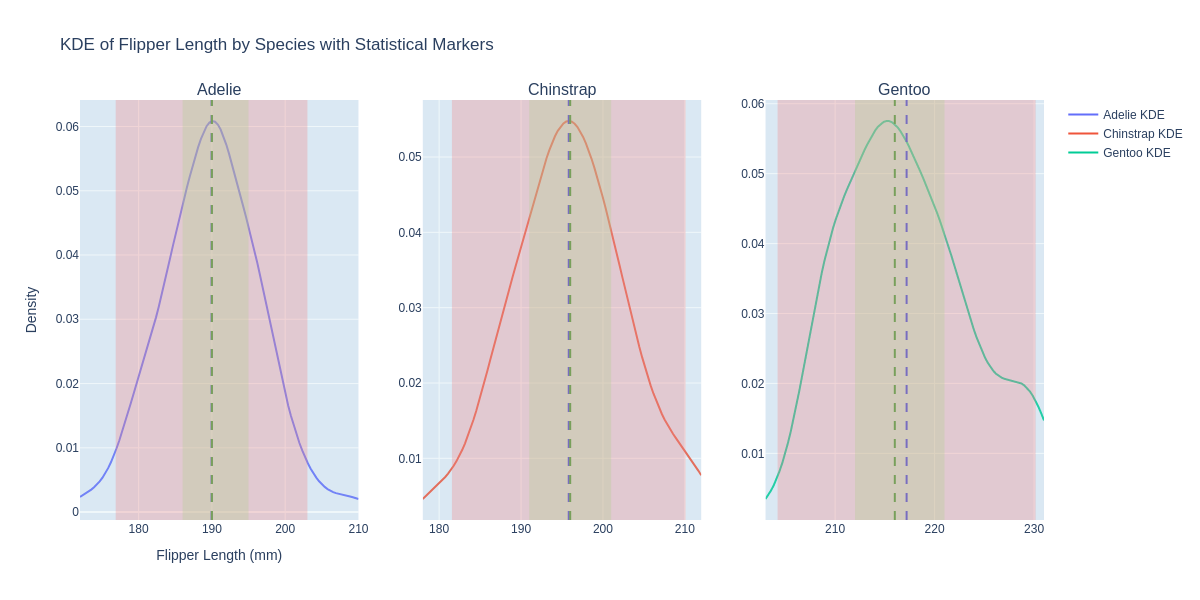

In [18]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# List of penguin species
species_list = penguins['species'].unique()

# Create subplots with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=species_list)

# Function to calculate KDE
def kde_curve(flipper_lengths):
    kde = gaussian_kde(flipper_lengths)
    x_vals = np.linspace(flipper_lengths.min(), flipper_lengths.max(), 100)
    y_vals = kde(x_vals)
    return x_vals, y_vals

# Function to add statistical markers (mean, median, range, IQR, 2*std)
def add_statistical_markers(flipper_lengths, species_name, row, col):
    # Calculate statistics
    mean_val = flipper_lengths.mean()
    median_val = flipper_lengths.median()
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()
    std_val = flipper_lengths.std()
    q1_val = flipper_lengths.quantile(0.25)
    q3_val = flipper_lengths.quantile(0.75)

    # Generate KDE curve
    x_vals, y_vals = kde_curve(flipper_lengths)

    # Add KDE curve to the subplot
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name=f'{species_name} KDE'), row=row, col=col)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line=dict(color='blue', dash='dash'), row=row, col=col)
    fig.add_vline(x=median_val, line=dict(color='green', dash='dash'), row=row, col=col)

    # Add vertical rectangles for range, IQR, and 2*std range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightblue", opacity=0.2, line_width=0, row=row, col=col)
    fig.add_vrect(x0=q1_val, x1=q3_val, fillcolor="lightgreen", opacity=0.3, line_width=0, row=row, col=col)
    fig.add_vrect(x0=mean_val - 2 * std_val, x1=mean_val + 2 * std_val, fillcolor="lightcoral", opacity=0.3, line_width=0, row=row, col=col)

# Loop through each species and create KDE plots with statistical markers
for i, species in enumerate(species_list):
    species_df = penguins[penguins['species'] == species]
    flipper_lengths = species_df['flipper_length_mm'].dropna()
    add_statistical_markers(flipper_lengths, species, row=1, col=i+1)

# Update layout for subplot appearance
fig.update_layout(title='KDE of Flipper Length by Species with Statistical Markers',
                  height=600, width=1200,
                  xaxis_title='Flipper Length (mm)',
                  yaxis_title='Density')

# Show the plot
fig.show(renderer="png")


# Q3

My personal preference for a data distribution visualization method is the KDE. The visuals of the graph are smooth and continuous, and show me the distribution of the data well unlike histograms which are heavily based on bins and don't look as aesthetically pleasing as KDE. But at the end of the day, the graph you use depends on the data you have.

ChatGPT Log Q1-Q3: https://chatgpt.com/share/66f38507-d728-8008-bd79-f4acb4c316dc

Second ChatGPT Log for Q1-Q2 because of errors and renderer="png" not working: https://chatgpt.com/share/66f38933-200c-8006-9ca6-08f8bf4cf80c

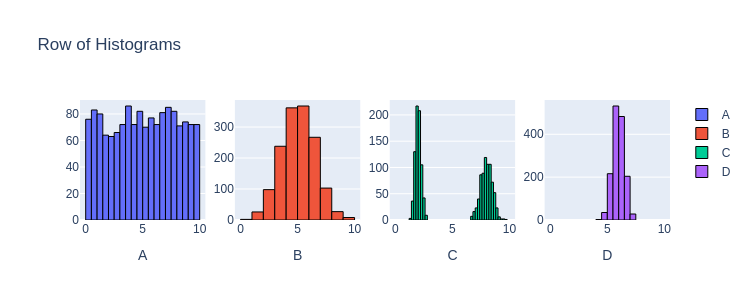

In [20]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. A and C have similar means and variances.
2. B and C have similiar mean but different variances. A and B have a similiar mean but different variance.
3. None have different means and similar variances.
4. A and D have different variance and different means. B and D have different variance and different means. C and D have different variance and different means.

# Q5

The right-skewed distribution is when the tail on the right side of the peak is longer than on the left. This happens when the mean is greater than the median, the mean has higher outliers on the right side, and the median stays near the center.

The left-skewed distribution is the tail on the left side of the peak being longer than the right side. This occurs when the mean is less than the median, with the mean having more outliers on the lower left side causing the skewed shape.

For example, the left side in red is the left skewed, and the right side in blue is the right skewed. Red is in the negatives and blue is in the positives.

ChatGPT log: https://chatgpt.com/share/66f5f777-6548-8006-a43e-aa7394cd0ab2

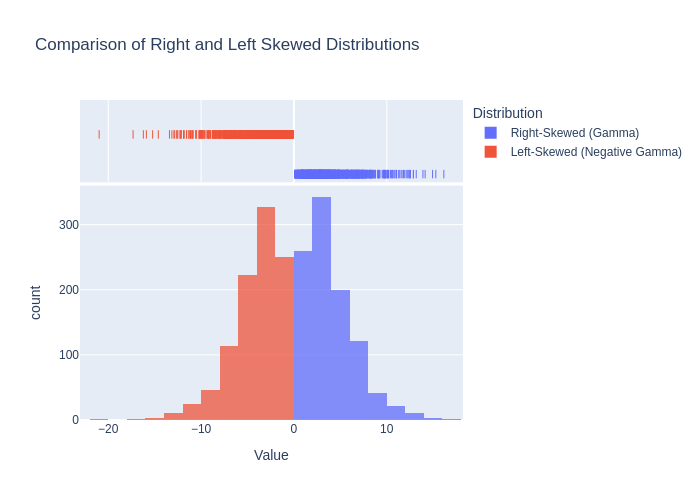

In [5]:
import plotly.express as px
import pandas as pd
from scipy import stats

# Generate the samples
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Convert the samples to DataFrames
df_sample1 = pd.DataFrame({'data': sample1, 'distribution': 'Right-Skewed (Gamma)'})
df_sample2 = pd.DataFrame({'data': sample2, 'distribution': 'Left-Skewed (Negative Gamma)'})

# Combine both samples into one DataFrame for easier plotting
df_combined = pd.concat([df_sample1, df_sample2])

# Create the histogram using Plotly
fig = px.histogram(df_combined, x='data', color='distribution', barmode='overlay', 
                   marginal='rug', opacity=0.75, nbins=30, 
                   title='Comparison of Right and Left Skewed Distributions',
                   labels={'data': 'Value', 'distribution': 'Distribution'})

# Show the figure
fig.show(renderer="png")


In [38]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Sushant-Jha/Valorant-Data-Sheets/refs/heads/main/VCT/NA%26EMEA.csv")
df

,Unnamed: 0,Region,Team,Player,Rnd,ACS,K:D,KAST,ADR,KPR,...,Clutches,KMax,K,D,A,FK,FD,FK+FD,Opening Duel Win %,FK/FD
0,0,North America,Cloud9,leaf,581,262,1.28,70.0%,169.0,0.92,...,11,30,537,420,121,120,96,216,55.6%,1.3
1,1,North America,XSET,Cryocells,459,252,1.45,69.0%,155.2,0.95,...,7,33,435,299,51,84,64,148,56.8%,1.3
2,2,EMEA,Acend,cNed,268,258,1.22,68.0%,162.5,0.90,...,1,29,240,196,40,50,25,75,66.7%,2.0
3,3,North America,XSET,AYRIN,459,166,0.80,72.0%,106.3,0.55,...,6,24,253,317,165,26,30,56,46.4%,0.9
4,4,EMEA,G2 Esports,nukkye,548,257,1.27,77.0%,173.1,0.84,...,9,30,462,364,170,71,55,126,56.4%,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,EMEA,BIG,Kaspe,281,147,0.69,62.0%,96.4,0.49,...,1,18,137,199,79,18,24,42,42.9%,0.8
122,122,EMEA,BBL Esports,pAura,224,158,0.66,61.0%,101.8,0.51,...,2,22,114,172,39,23,33,56,41.1%,0.7
123,123,EMEA,Acend,BONECOLD,268,164,0.83,67.0%,110.3,0.56,...,4,20,149,179,62,18,33,51,35.3%,0.5
124,124,EMEA,Acend,Kiles,268,145,0.67,60.0%,98.2,0.49,...,2,15,130,194,69,12,20,32,37.5%,0.6


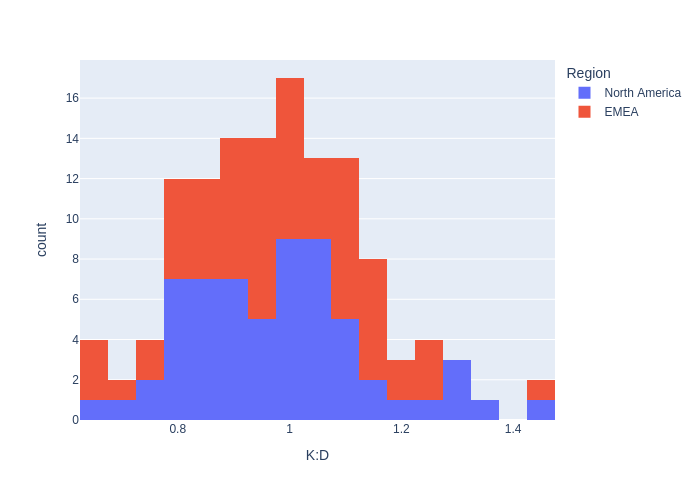

In [42]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("https://raw.githubusercontent.com/Sushant-Jha/Valorant-Data-Sheets/refs/heads/main/VCT/NA%26EMEA.csv")

fig = px.histogram(df, x="K:D", nbins=30, color="Region") #number of bins
fig.show(renderer='png')



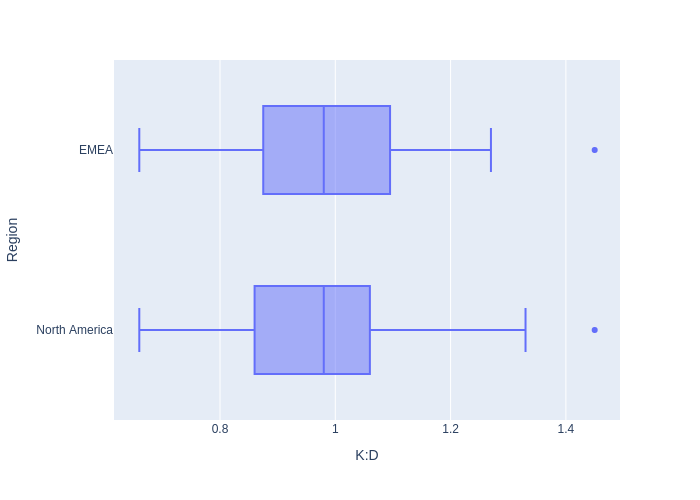

In [48]:
fig = px.box(df, x="K:D", y="Region") #number of bins
fig.show(renderer='png')

# Q6

The datasets above are about Valorant pros and their stats. For me I've always wondered what region is better, EMEA or NA? Turns out all I need is data about all of their stats and I can see that they have almost identical stats, but EMEA is a little bit better... It seems in the average EMEA player has around a +0.035 K:D on the average NA player, but the upper fence of NA is a bit better with a +0.06 K:D difference.

# Q8

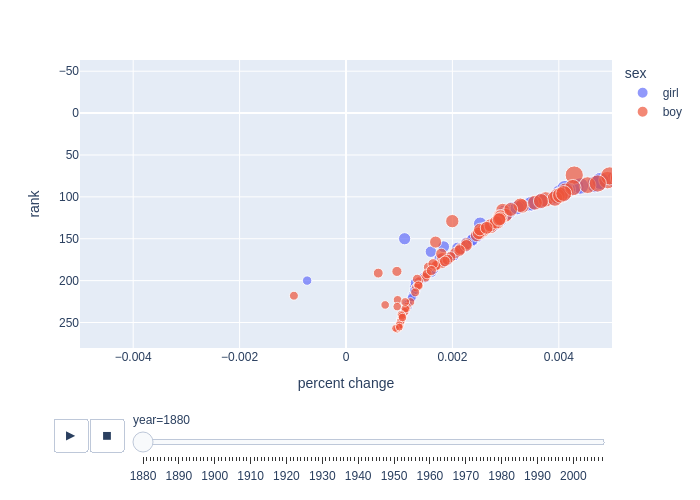

In [55]:
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Q9

Somewhat